In [1]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from PyEMD import EMD, EEMD
import numpy as np
from sklearn.decomposition import PCA
from src.features.utilities import chop_timeseries

In [2]:
# Load data
with open('data/Case_2_a_only_basic_DQ', 'rb') as f:
    ((data1_1_df, data1_2_df, data1_3_df),(mean1_df,std1_df)) = pickle.load(f)

data1_df = pd.concat([data1_1_df,data1_2_df,data1_3_df],axis=0)
data1_df = data1_df * std1_df + mean1_df

(imin,_) = next((i, el) for i, el in enumerate(data1_df.HDEP.values) if el < 200)
data_df = data1_df.iloc[imin:]

In [3]:
data = data_df[["ASMPAM1_T", "ASMPAM2_T", "ASMPAM3_T", "FLIAVG", "FLOAVG", "HKLDAV", "ROPA"]]

In [4]:
len(data.values)

1529293

In [125]:
plt.subplots(len(data.keys()),1, figsize=(15, 10))
t = np.linspace(0, len(data.values), len(data.values))

for i,key in enumerate(data.keys()):
    plt.subplot(len(data.keys()), 1, i+1)
    data_values = data[key].values
    for i, d in enumerate(data_values):
        if (i < 1080000) and (i > 1325000):
            plt.plot(i, d)
        else:
            plt.plot(i, d, color="green")
    plt.title(key)
plt.tight_layout()
plt.savefig("figures/data.png", )

KeyboardInterrupt: 

In [73]:
data = data_df[["ASMPAM1_T", "ASMPAM2_T", "ASMPAM3_T", "FLIAVG", "FLOAVG", "HKLDAV", "ROPA"]].iloc[1080000:1325000]

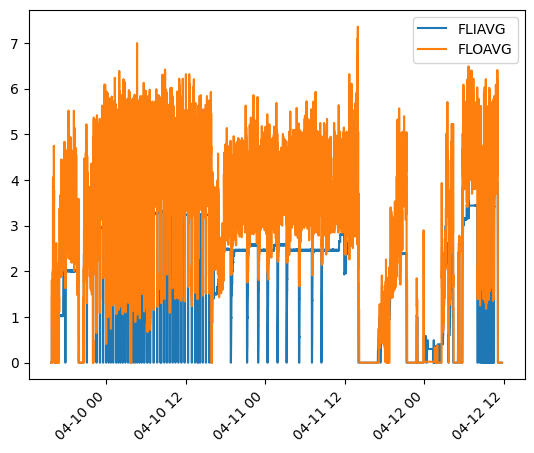

In [65]:
plt.plot(data[["FLIAVG", "FLOAVG"]])
plt.xticks(rotation=45, ha='right');
plt.legend(["FLIAVG", "FLOAVG"]);

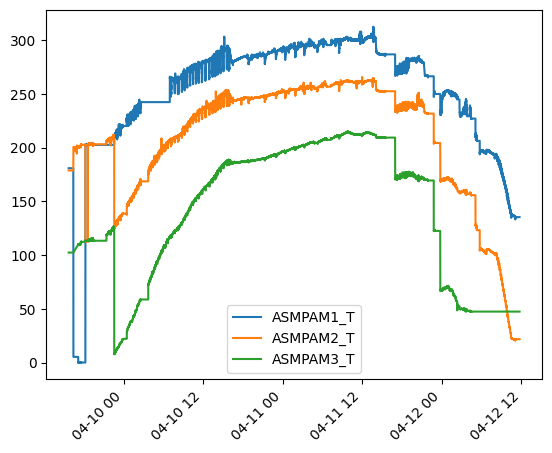

In [66]:
plt.plot(data[["ASMPAM1_T", "ASMPAM2_T", "ASMPAM3_T"]])
plt.xticks(rotation=45, ha='right');
plt.legend(["ASMPAM1_T", "ASMPAM2_T", "ASMPAM3_T"]);

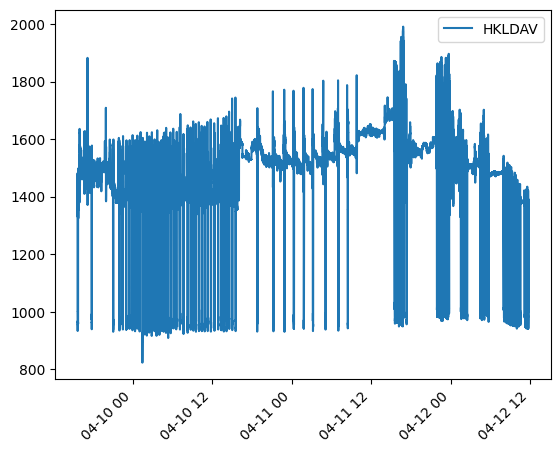

In [67]:
plt.plot(data["HKLDAV"])
plt.xticks(rotation=45, ha='right');
plt.legend(["HKLDAV"]);

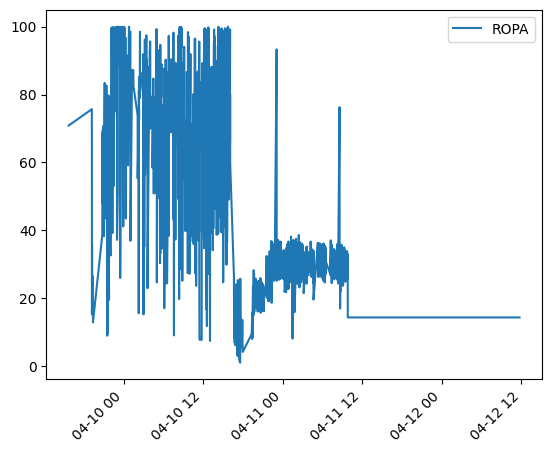

In [68]:
plt.plot(data[["ROPA"]])
plt.xticks(rotation=45, ha='right');
plt.legend(["ROPA"]);

In [74]:
data.mean()

ASMPAM1_T     250.787833
ASMPAM2_T     207.627044
ASMPAM3_T     139.089167
FLIAVG          2.000859
FLOAVG          2.971631
HKLDAV       1459.474875
ROPA           35.819723
dtype: float64

In [86]:
feature_names = ["ASMPAM1_T", "ASMPAM2_T", "ASMPAM3_T", "FLIAVG", "FLOAVG", "HKLDAV"]
feature_types = ["DWT_complete_samples", "EEMD_complete_samples", "EMD_complete_samples", "EEMD_DWT_complete_samples", "EMD_DWT_complete_samples", "noDecomp_complete"]

path = lambda feature_name, feature_type: f"features/new_features/{feature_name}/{feature_type}.csv"

all_features = pd.DataFrame()
for feature_name in feature_names:
    for feature_type in feature_types:
        f = pd.read_csv(path(feature_name, feature_type))
        all_features = pd.concat([all_features, f], axis=1)

In [87]:
print(f"Shape of dataset before removal of NaN and other unused columns: {all_features.shape}")

Shape of dataset before removal of NaN and other unused columns: (245, 16224)


In [88]:
all_features.dropna(inplace=True, axis=1)
all_features.drop(columns=["Unnamed: 0"], inplace=True)

In [78]:
print(f"Shape of dataset after removal of NaN and other unused columns: {all_features.shape}")

Shape of dataset after removal of NaN and other unused columns: (245, 13769)


In [79]:
# Perform PCA on dataframe with all features
pca = PCA()
pca.fit(all_features)

PCA()

In [80]:
chopped_timeseries = chop_timeseries(data, 1000)

In [89]:
scores = pca.fit_transform(all_features)

In [90]:
cmap = plt.get_cmap("winter", len(chopped_timeseries))
timeseries_plot = []
for i, timeseries in enumerate(chopped_timeseries):
    timeseries_plot.append({'t': np.linspace(i*len(timeseries), (i+1)*len(timeseries), len(timeseries)), 'x': timeseries, 'col': cmap(i)})

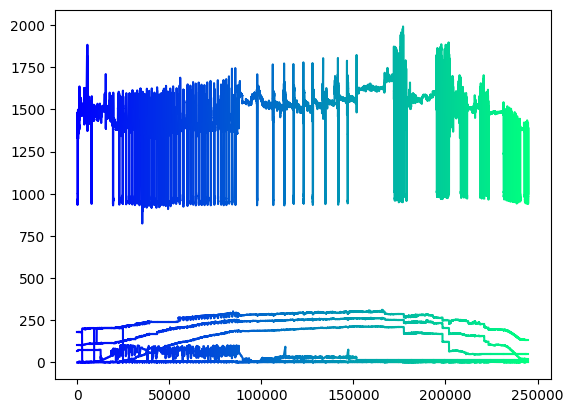

In [91]:
for timeserie in timeseries_plot:
    plt.plot(timeserie['t'], timeserie['x'], color=timeserie['col'])
plt.savefig("figures/timeseries.png")

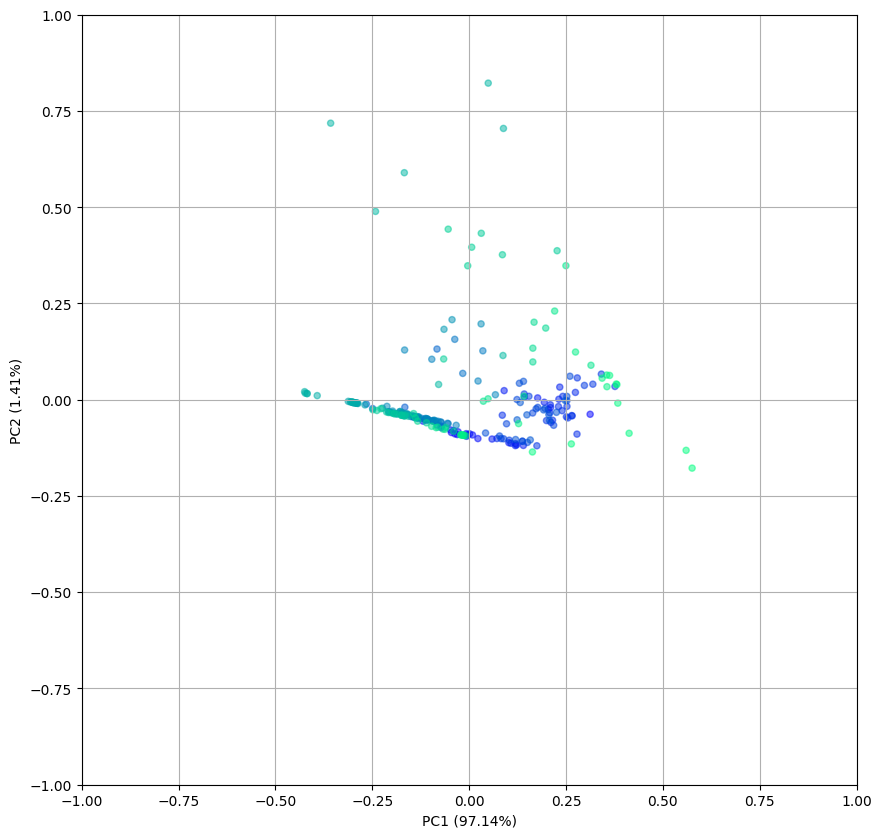

<Figure size 640x480 with 0 Axes>

In [104]:
scores = pca.fit_transform(all_features)

fig, ax = plt.subplots(1, 1, figsize=(10,10))

xs = scores[:,0]
ys = scores[:,1]
scalex = 1.0/(xs.max() - xs.min())
scaley = 1.0/(ys.max() - ys.min())
plt.scatter(xs * scalex,ys * scaley, s=20, alpha=0.5, c=[cmap(i) for i in range(len(chopped_timeseries))])
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.2f}%)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.2f}%)")

plt.grid()
plt.show()
plt.tight_layout()
fig.savefig("figures/PCA.png", dpi=300)

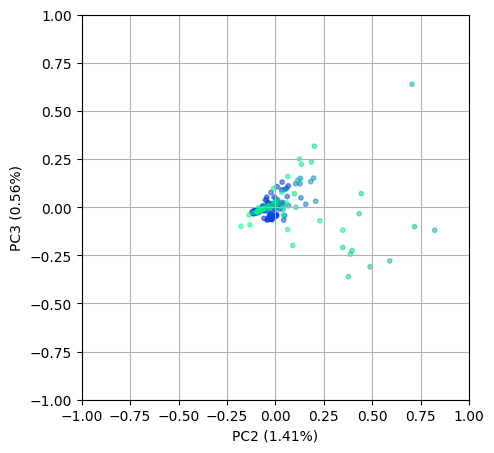

In [99]:
scores = pca.fit_transform(all_features)

fig, ax = plt.subplots(1, 1, figsize=(5,5))

xs = scores[:,1]
ys = scores[:,2]
scalex = 1.0/(xs.max() - xs.min())
scaley = 1.0/(ys.max() - ys.min())
plt.scatter(xs * scalex,ys * scaley, s=10, alpha=0.5, c=[cmap(i) for i in range(len(chopped_timeseries))])
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.xlabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.2f}%)")
plt.ylabel(f"PC3 ({pca.explained_variance_ratio_[2]*100:.2f}%)")
plt.grid()
plt.show()
fig.savefig("figures/PCA.png", dpi=300)

/var/folders/f5/y5jwy7g16938953ybw9d9kpc0000gn/T/ipykernel_6911/1793741105.py:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(6, 2, 2*i+1)


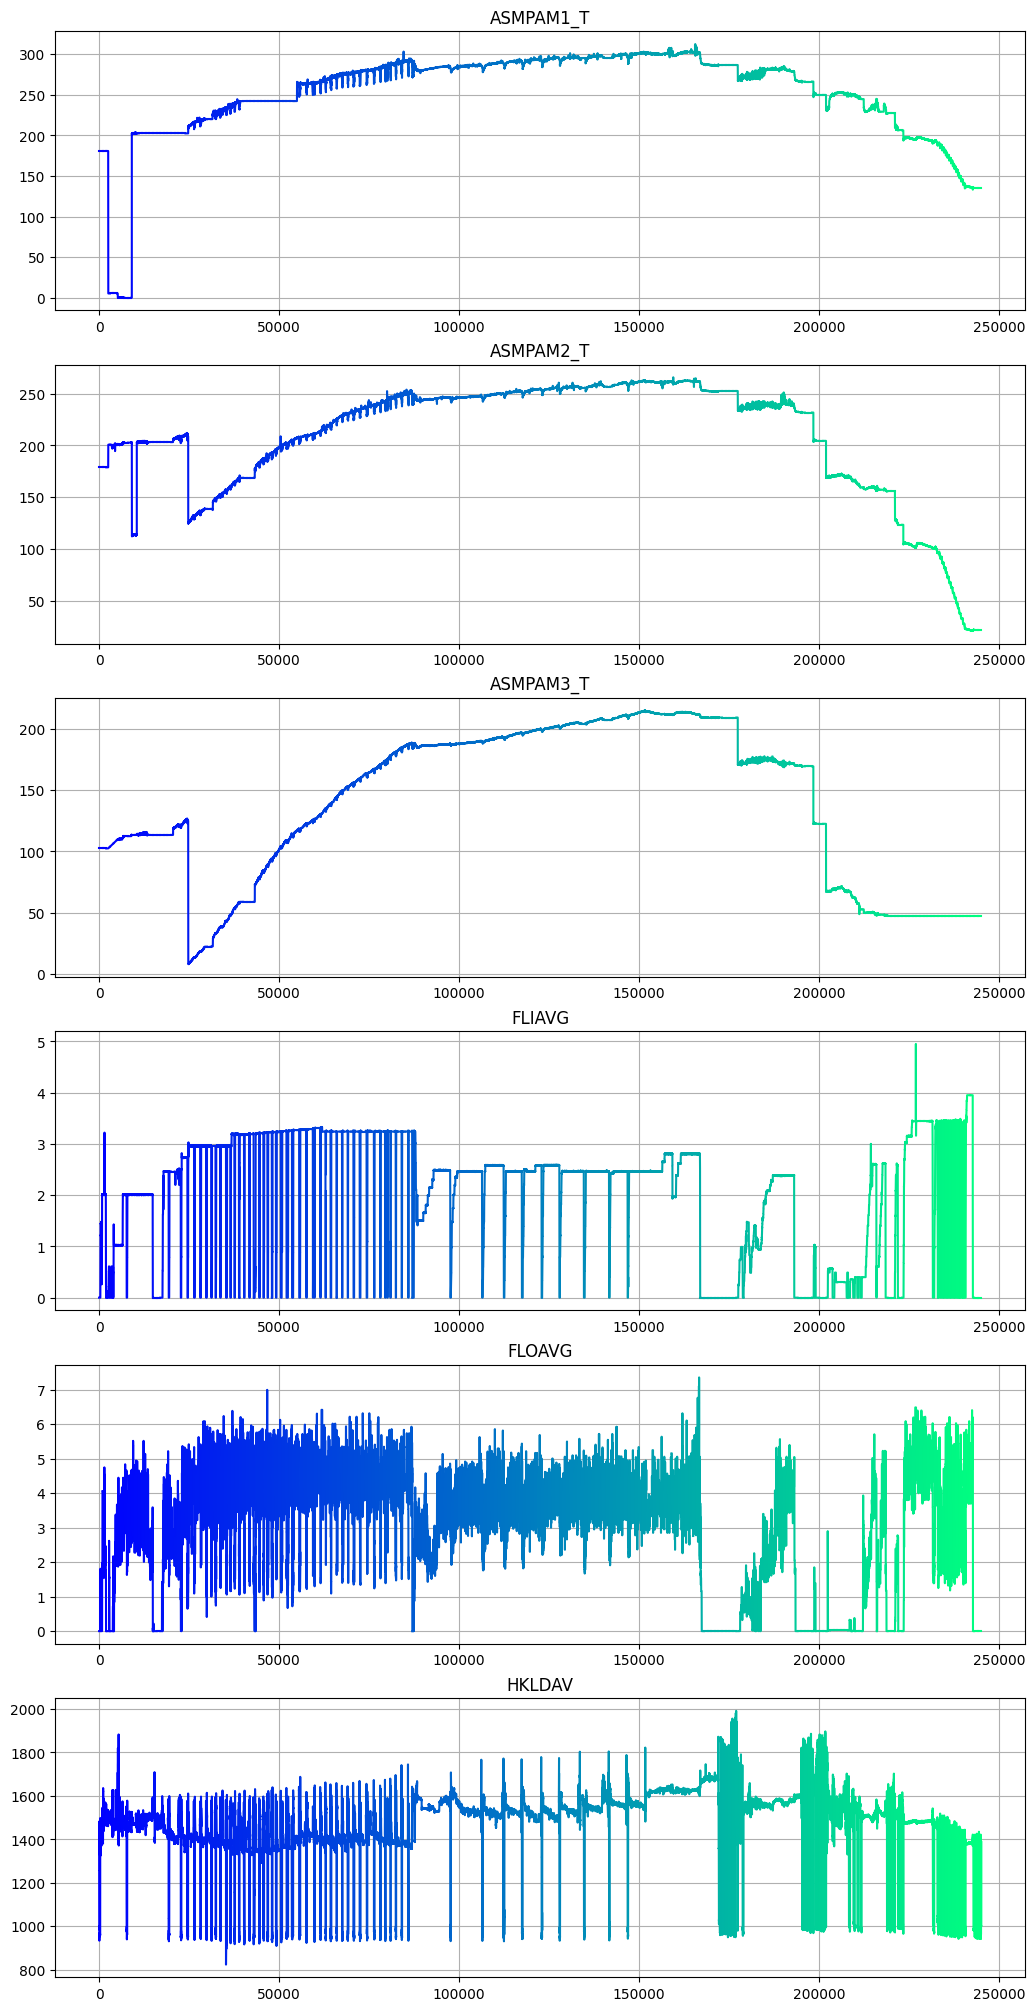

In [115]:
cmap = plt.get_cmap("winter", len(chopped_timeseries))
timeseries_plot = []
for i, timeseries in enumerate(chopped_timeseries):
    timeseries_plot.append({'t': np.linspace(i*len(timeseries), (i+1)*len(timeseries), len(timeseries)), 'x': timeseries, 'col': cmap(i)})

fig, ax = plt.subplots(6, 1, figsize=(20,20), constrained_layout=True)

for timeseries in timeseries_plot:
    for i, k in enumerate(timeseries['x'].keys()[:-1]):
        plt.subplot(6, 2, 2*i+1)
        plt.plot(timeseries['t'], timeseries['x'][k].values, color=timeseries['col'])
        plt.title(k)
        plt.grid()

plt.tight_layout    
plt.savefig(f"figures/data_graded.png")

#plt.subplot(2, 2, 2)
#xs = scores[:,0]
#ys = scores[:,1]
#scalex = 1.0/(xs.max() - xs.min())
#scaley = 1.0/(ys.max() - ys.min())
#plt.scatter(xs * scalex,ys * scaley, s=10, alpha=0.5, c=[cmap(i) for i in range(len(chopped_timeseries))])
#plt.xlim(-1,1)
#plt.ylim(-1,1)
#plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.2f}%)")
#plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.2f}%)")
#plt.grid()
#plt.tight_layout()
#
#plt.subplot(2, 2, 4)
#xs = scores[:,2]
#ys = scores[:,3]
#scalex = 1.0/(xs.max() - xs.min())
#scaley = 1.0/(ys.max() - ys.min())
#plt.scatter(xs * scalex,ys * scaley, s=10, alpha=0.5, c=[cmap(i) for i in range(len(chopped_timeseries))])
#plt.xlim(-1,1)
#plt.ylim(-1,1)
#plt.xlabel(f"PC3 ({pca.explained_variance_ratio_[2]*100:.2f}%)")
#plt.ylabel(f"PC4 ({pca.explained_variance_ratio_[3]*100:.2f}%)")
#plt.grid()
#plt.tight_layout()

#Remove the plot at subplot (7, 2, 8)
#plt.delaxes(plt.subplot(7, 2, 8))

#plt.show()
#fig.savefig("figures/PCA.png", dpi=300)

In [ ]:
all_features.dropna(axis=0, inplace=True)

In [ ]:
all_features

,ASMPAM1_T_level_0_mean,ASMPAM1_T_level_0_std,ASMPAM1_T_level_0_skew,ASMPAM1_T_level_0_max,ASMPAM1_T_level_0_median,ASMPAM1_T_level_0_min,ASMPAM1_T_level_0_energy,ASMPAM1_T_level_0_entropy,ASMPAM1_T_level_0_zcr_mean,ASMPAM1_T_level_0_zcr_std,...,ROPA_spec_contrast_skew,ROPA_spec_contrast_max,ROPA_spec_contrast_median,ROPA_spec_contrast_min,ROPA_spec_bandwidth_mean,ROPA_spec_bandwidth_std,ROPA_spec_bandwidth_skew,ROPA_spec_bandwidth_max,ROPA_spec_bandwidth_median,ROPA_spec_bandwidth_min
0,5.329033e-04,1.534928e+00,0.778842,3.910094e+00,-2.527300e-03,-2.883728e+00,2.356005e+00,-7.327687e+01,0.004395,0.0,...,-2.871804e-15,18.398238,16.562580,14.726921,2390.677583,91.958241,0.000000e+00,2482.635824,2390.677583,2482.635824
1,1.666423e-03,8.159988e-01,-0.233858,1.779095e+00,5.519406e-02,-1.869277e+00,6.658568e-01,-6.035790e+00,0.003418,0.0,...,0.000000e+00,20.717508,17.195781,13.674053,2416.015768,179.934900,0.000000e+00,2595.950668,2416.015768,2595.950668
2,5.540260e-02,2.803600e+01,-0.164547,5.658692e+01,1.083236e+00,-5.260785e+01,7.860203e+02,-8.965323e+04,0.005371,0.0,...,0.000000e+00,23.444511,21.309280,19.174049,2083.309770,28.043449,0.000000e+00,2111.353219,2083.309770,2111.353219
3,-1.232837e-02,2.328778e+01,0.436363,6.331446e+01,-4.469487e-02,-5.039798e+01,5.423207e+02,-6.379530e+04,0.003418,0.0,...,0.000000e+00,16.173011,15.441739,14.710468,2402.020970,52.859493,0.000000e+00,2454.880463,2402.020970,2454.880463
4,5.260746e-02,8.602510e+00,-0.854898,1.274565e+01,1.299693e+00,-2.112656e+01,7.400595e+01,-5.811567e+03,0.005371,0.0,...,0.000000e+00,21.890954,18.196937,14.502920,2330.631178,78.261119,8.682565e-15,2408.892297,2330.631178,2408.892297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1.535117e-02,8.209079e+01,-0.765991,1.797925e+02,8.312771e-02,-2.339333e+02,6.738898e+03,-1.050978e+06,0.004395,0.0,...,0.000000e+00,20.075174,17.184951,14.294729,2324.494293,170.718266,-3.930786e-15,2495.212559,2324.494293,2495.212559
96,4.442742e-13,4.261870e-13,2.396970,1.890599e-12,4.126699e-13,-4.207745e-14,3.790150e-25,3.130318e-22,0.000000,0.0,...,0.000000e+00,20.590487,19.036550,17.482613,2361.988137,54.070964,0.000000e+00,2416.059101,2361.988137,2416.059101
97,4.442742e-13,4.261870e-13,2.396970,1.890599e-12,4.126699e-13,-4.207745e-14,3.790150e-25,3.130318e-22,0.000000,0.0,...,0.000000e+00,20.262245,17.068446,13.874646,2384.384417,108.432953,0.000000e+00,2492.817370,2384.384417,2492.817370
98,4.442742e-13,4.261870e-13,2.396970,1.890599e-12,4.126699e-13,-4.207745e-14,3.790150e-25,3.130318e-22,0.000000,0.0,...,0.000000e+00,17.794085,17.086095,16.378104,2248.182376,128.002082,0.000000e+00,2376.184458,2248.182376,2376.184458


In [ ]:
# Perform PCA on dwt dataframe
pca = PCA()
pca.fit(all_features)

PCA()

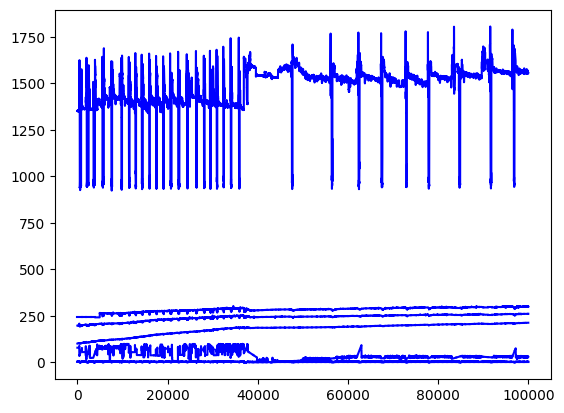

In [ ]:
for i, timeserie in enumerate(timeseries_plot):
    if (i > 1075) and (i < 1250):
        plt.plot(timeserie['t'], timeserie['x'], color="red")
    elif (i > 1250) and (i < 1350):
        plt.plot(timeserie['t'], timeserie['x'], color="purple")
    elif (i > 400) and (i < 795):
        plt.plot(timeserie['t'], timeserie['x'], color="yellow")
    elif (i > 795) and (i < 876):
        plt.plot(timeserie['t'], timeserie['x'], color="pink")
    elif (i > 875) and (i < 935):
        plt.plot(timeserie['t'], timeserie['x'], color="green")
    elif(i > 360) and (i < 410):
        plt.plot(timeserie['t'], timeserie['x'], color="orange")
    else:
        plt.plot(timeserie['t'], timeserie['x'], color="blue") #color=timeserie['col'])
plt.savefig("figures/timeseries.png")

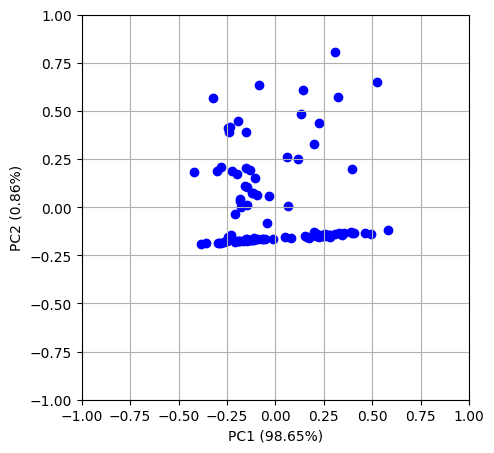

In [ ]:
scores = pca.fit_transform(all_features)

fig, ax = plt.subplots(1, 1, figsize=(5,5))

xs = scores[:,0]
ys = scores[:,1]
scalex = 1.0/(xs.max() - xs.min())
scaley = 1.0/(ys.max() - ys.min())
for i, (x, y) in enumerate(zip(xs, ys)):
    if (i > 1075) and (i < 1250):
        plt.scatter(x * scalex, y * scaley, color="red")
    elif (i > 1250) and (i < 1350):
        plt.scatter(x * scalex, y * scaley, color="purple")
    elif (i > 400) and (i < 775):
        plt.scatter(x * scalex, y * scaley, color="yellow")
    elif (i > 795) and (i < 876):
        plt.scatter(x * scalex, y * scaley, color="pink")
    elif (i > 875) and (i < 935):
        plt.scatter(x * scalex, y * scaley, color="green")
    elif(i > 350) and (i < 410):
        plt.scatter(x * scalex, y * scaley, color="orange")
    else:
        plt.scatter(x * scalex, y * scaley, color="blue") #c=[cmap(i) for i in range(len(chopped_timeseries))])
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.2f}%)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.2f}%)")
plt.grid()
plt.show()
fig.savefig("figures/PCA.png", dpi=300)

In [ ]:
explained_variance = pca.explained_variance_ratio_[:10] / np.sum(pca.explained_variance_ratio_[:10]) * 100

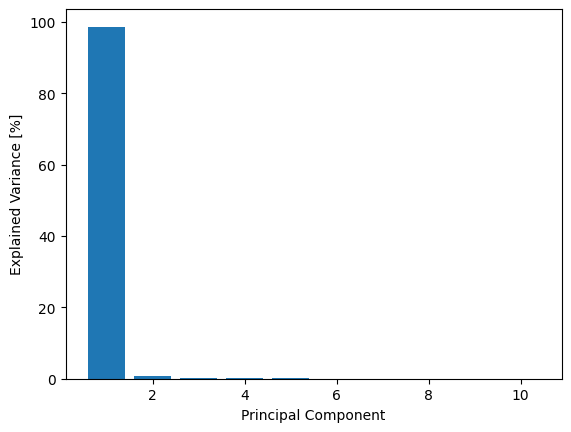

In [ ]:
plt.bar(range(1, len(explained_variance)+1), explained_variance)
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance [%]")
plt.show()